In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


In [2]:
wine = load_wine()
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [3]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
wine.feature_names


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
# 数据分割
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [7]:
Xtrain.shape

(124, 13)

In [8]:
wine.data.shape

(178, 13)

In [9]:
# 建模
# 第一步 实例化
clf = tree.DecisionTreeClassifier(criterion="entropy")
# 第二步 训练模型
clf = clf.fit(Xtrain, ytrain)
# 第三步 使用接口导出我们需要的分数
score = clf.score(Xtest, ytest)  # score 就是对模型精确度的衡量


In [10]:
score

0.9444444444444444

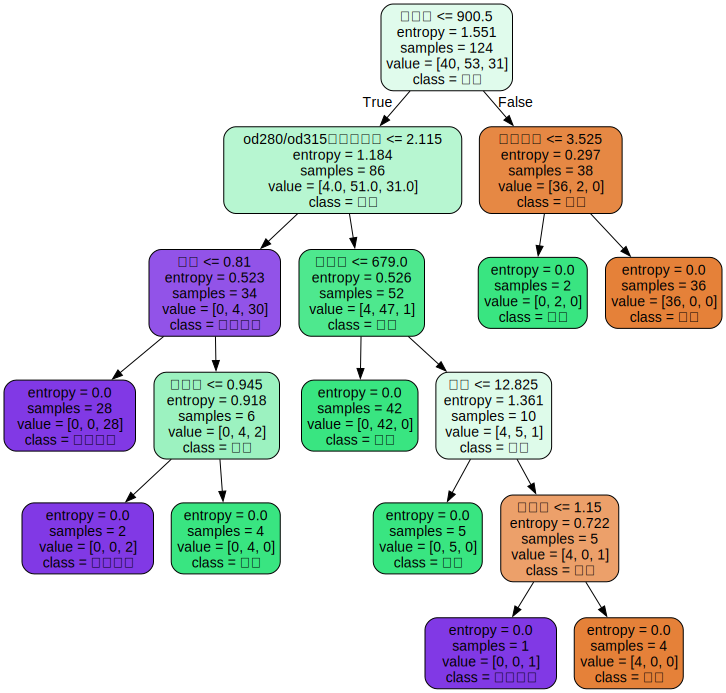

In [23]:
import graphviz
feature_name = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮',
                 '非黄烷类酚类', '花青素', '颜色强度', '色调', 'od280/od315稀释葡萄酒', '脯氨酸']
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_name,
                                class_names=["情久","雪梨","贝尔莫得"],
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)
graph

In [18]:
clf.feature_importances_   # 属性不是方法

array([0.05200658, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02865446, 0.        , 0.01877251, 0.05878796,
       0.06374574, 0.29467337, 0.48335939])

In [24]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', np.float64(0.05200658326952222)),
 ('苹果酸', np.float64(0.0)),
 ('灰', np.float64(0.0)),
 ('灰的碱性', np.float64(0.0)),
 ('镁', np.float64(0.0)),
 ('总酚', np.float64(0.0)),
 ('类黄酮', np.float64(0.028654457255886102)),
 ('非黄烷类酚类', np.float64(0.0)),
 ('花青素', np.float64(0.018772506790683572)),
 ('颜色强度', np.float64(0.05878795807841371)),
 ('色调', np.float64(0.06374573666953844)),
 ('od280/od315稀释葡萄酒', np.float64(0.29467337184455217)),
 ('脯氨酸', np.float64(0.48335938609140383))]